In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\DailyDelhiClimateTrain.csv", parse_dates=["date"])

In [6]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [8]:
df.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


In [9]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [10]:
df=df.sort_values('date').reset_index(drop=True)

Sorting according to dates

In [102]:
df=df.set_index('date')

In [12]:
df.index.is_monotonic_increasing #checking if data is sorted properly

True

In [13]:
df.index.duplicated().sum()

np.int64(0)

In [14]:
df.asfreq('D').isnull().sum() ##checking for any skipped dates

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

## Visualizing variance over the years

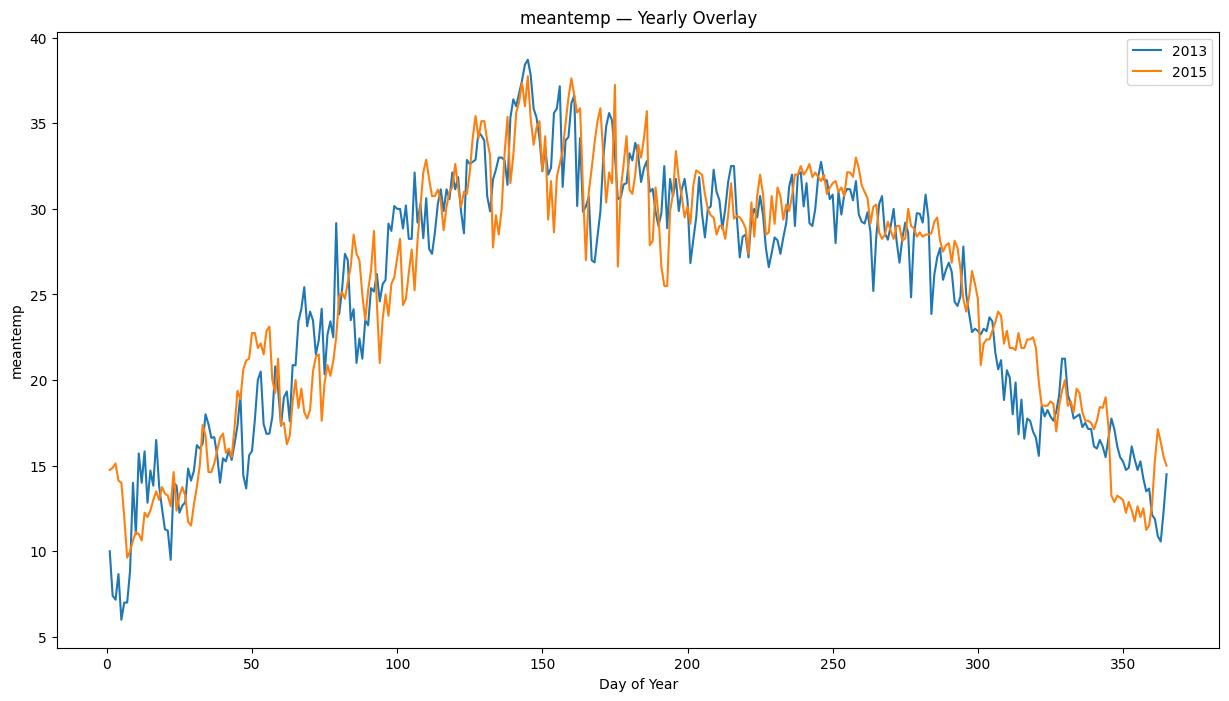

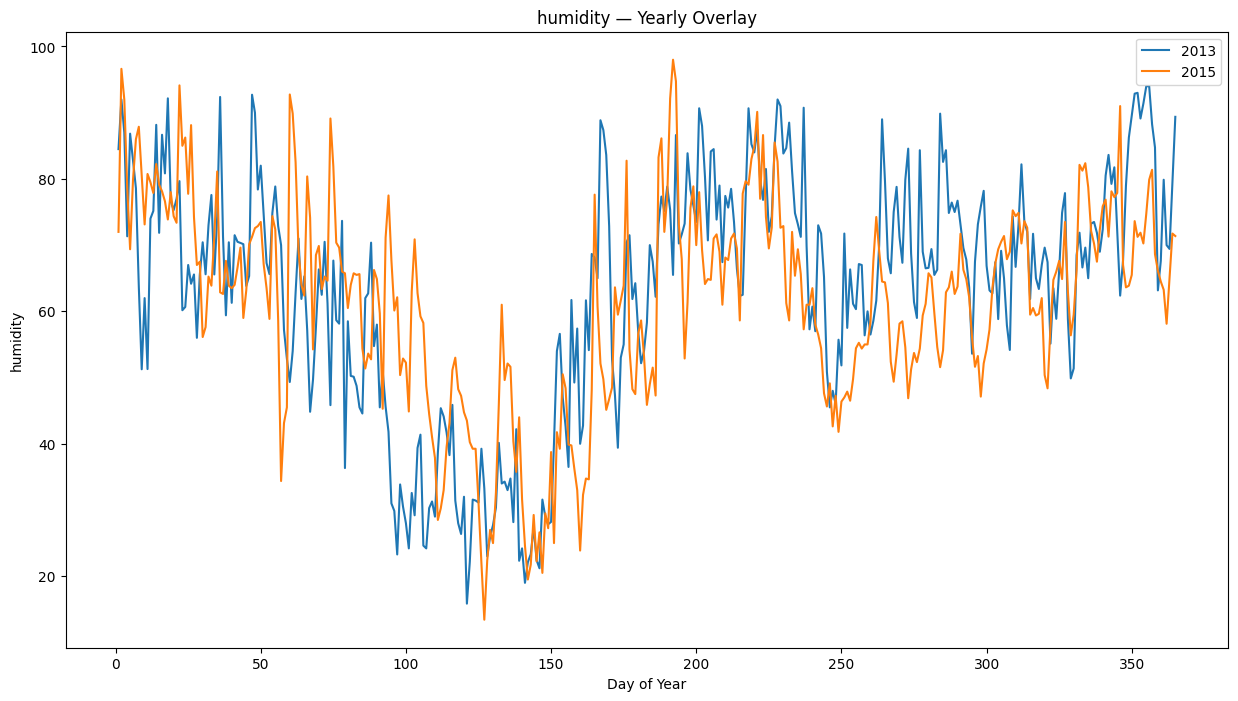

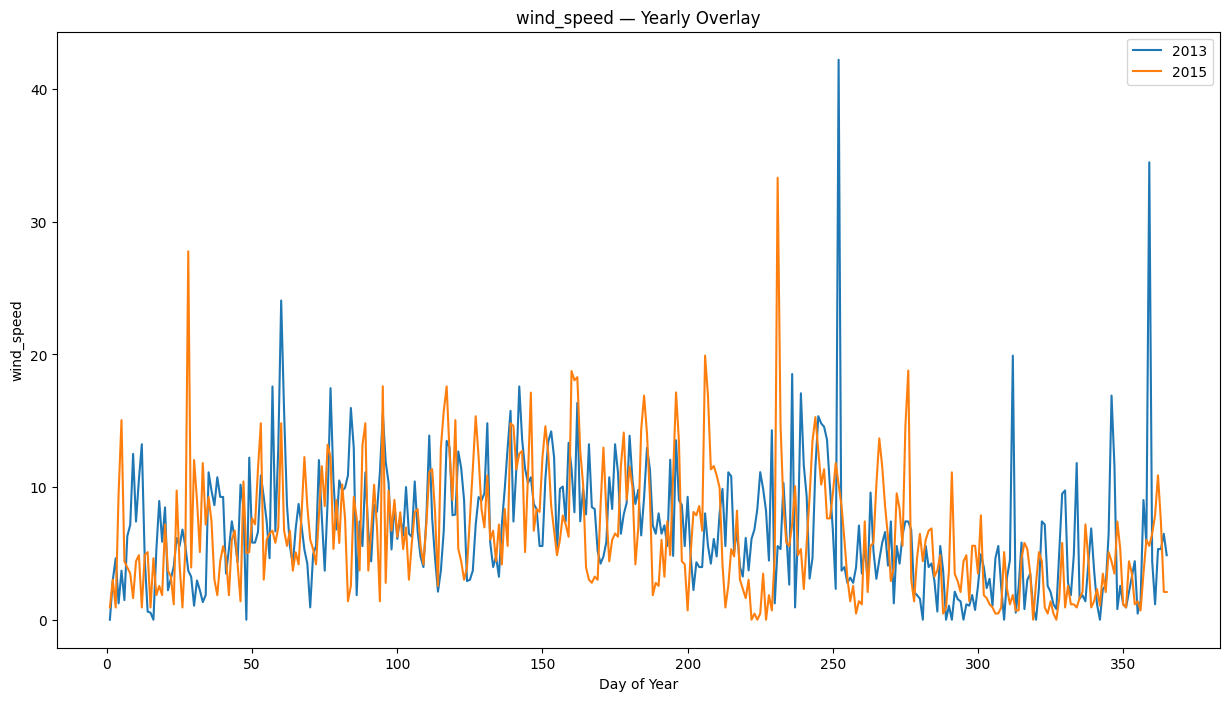

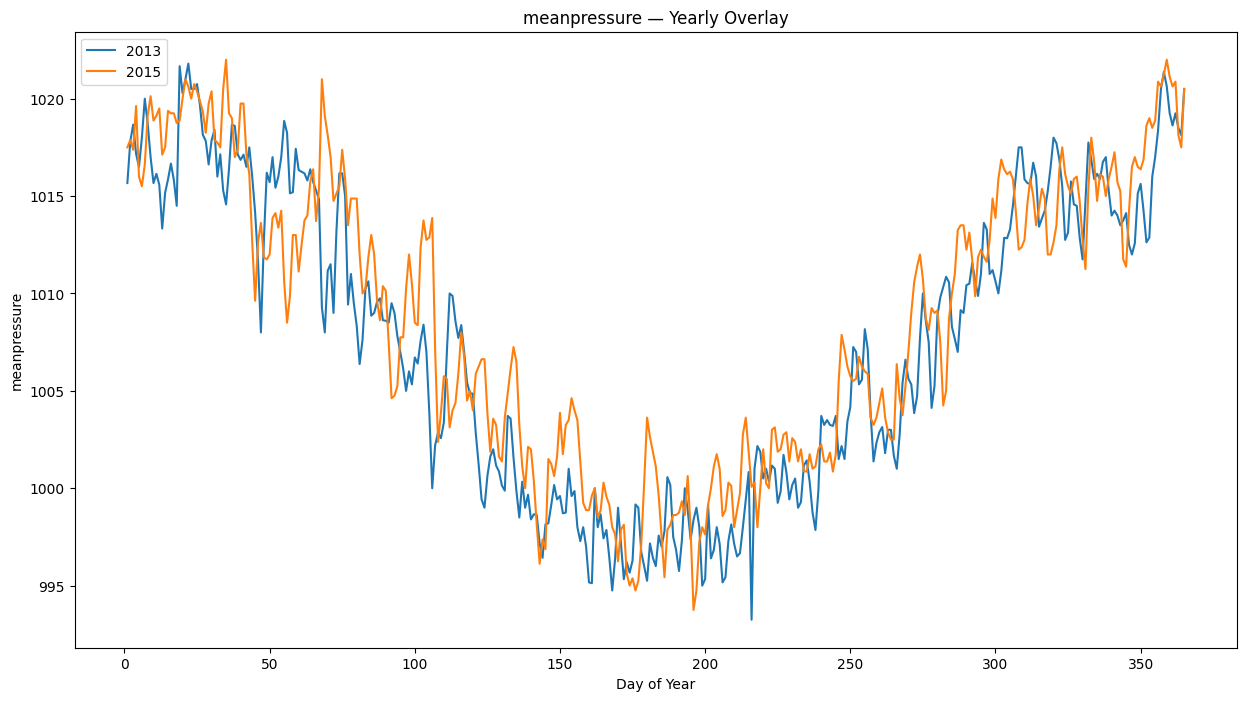

In [15]:

for cols in df.columns[df.columns!='date']:
    plt.figure(figsize=(15,8))
    for start_year in [2013, 2015]:
        mask = (df.index.year >= start_year) & (df.index.year < start_year + 1)
        subset = df.loc[mask, cols]
    
        # Convert to day-of-year for x-axis
        x = subset.index.dayofyear
        
        plt.plot(x, subset, label=f'{start_year}')
    
    plt.xlabel("Day of Year")
    plt.ylabel(cols)
    plt.title(f"{cols} — Yearly Overlay")
    plt.legend()
    plt.show()

In [16]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [17]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [18]:
for cols in df.columns:
    print(cols)
    print(f"mean: {df.groupby(df.index.year)[cols].mean()}")
    print(f"max: {df.groupby(df.index.year)[cols].max()}")
    print(f"min: {df.groupby(df.index.year)[cols].min()}")

meantemp
mean: date
2013    24.791494
2014    25.010673
2015    25.114591
2016    27.103373
2017    10.000000
Name: meantemp, dtype: float64
max: date
2013    38.714286
2014    38.500000
2015    37.750000
2016    38.272727
2017    10.000000
Name: meantemp, dtype: float64
min: date
2013     6.0000
2014     9.0000
2015     9.6250
2016    11.1875
2017    10.0000
Name: meantemp, dtype: float64
humidity
mean: date
2013     63.046292
2014     59.767942
2015     61.430490
2016     58.740174
2017    100.000000
Name: humidity, dtype: float64
max: date
2013     94.000000
2014     96.857143
2015     98.000000
2016     94.300000
2017    100.000000
Name: humidity, dtype: float64
min: date
2013     15.857143
2014     20.875000
2015     13.428571
2016     18.466667
2017    100.000000
Name: humidity, dtype: float64
wind_speed
mean: date
2013    6.827253
2014    6.756148
2015    6.480603
2016    7.162480
2017    0.000000
Name: wind_speed, dtype: float64
max: date
2013    42.220000
2014    30.685714
201

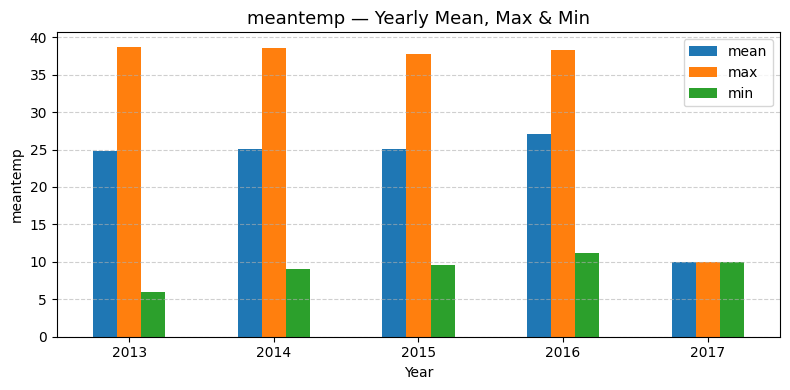

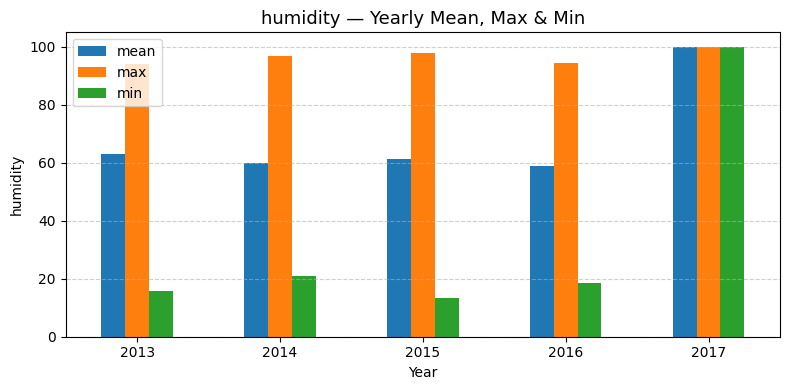

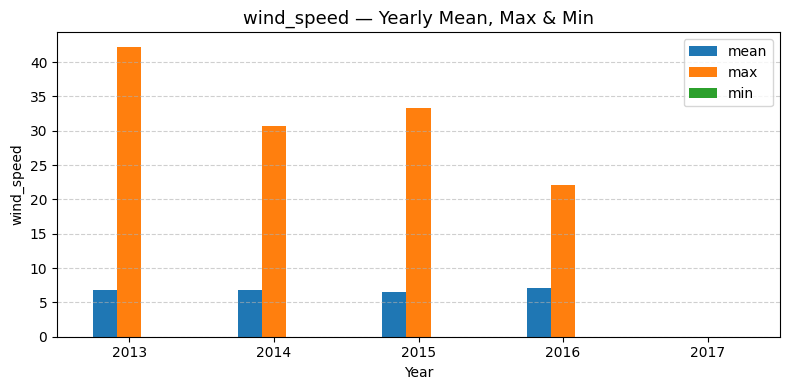

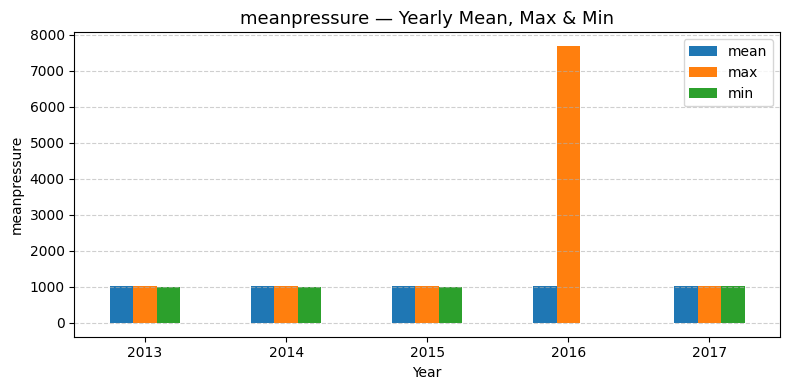

In [19]:
for col in df.columns:
    stats = df.groupby(df.index.year)[col].agg(['mean', 'max', 'min'])
    stats.plot(kind='bar', figsize=(8,4))
    plt.title(f"{col} — Yearly Mean, Max & Min", fontsize=13)
    plt.ylabel(col)
    plt.xlabel("Year")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [103]:
df['month']=df.index.month
df['year']=df.index.year
df['day']=df.index.day

In [21]:
temp=pd.DataFrame(df.groupby(['year','month'])['meantemp'].mean())
temp=temp.reset_index()


In [22]:
hottest = temp.loc[temp.groupby('year')['meantemp'].idxmax()]
hottest


,year,month,meantemp
4,2013,5,33.776767
17,2014,6,34.770833
28,2015,5,33.352535
41,2016,6,34.946836
48,2017,1,10.000000


## hottest month of each year

In [23]:
coldest = temp.loc[temp.groupby('year')['meantemp'].idxmin()]
coldest


,year,month,meantemp
0,2013,1,12.074770
12,2014,1,13.431836
24,2015,1,12.708525
36,2016,1,15.139363
48,2017,1,10.000000


## coldest month of each year

In [24]:
tempest=pd.DataFrame(df.groupby(['year'])['wind_speed'].max())
tempest=tempest.reset_index()

In [25]:
for i,r in df.iterrows():
    for j,k in tempest.iterrows():
        if (k['year'] == r.year and k['wind_speed'] == r['wind_speed']):
            print(r.year,r.month,r.day,r.wind_speed)

2013.0 9.0 9.0 42.22
2014.0 9.0 23.0 30.685714285714283
2015.0 8.0 19.0 33.325
2016.0 3.0 22.0 22.1
2017.0 1.0 1.0 0.0


## Days of year with maximum wind speed

Outlier Analysis

In [26]:
num_cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Outliers per column (IQR method):")
print(outliers_iqr.sum())

df['IQR_Outlier'] = outliers_iqr.any(axis=1)


Outliers per column (IQR method):
meantemp         0
humidity         2
wind_speed      30
meanpressure     9
dtype: int64


In [27]:
from scipy.stats import zscore
z_scores = np.abs(df[num_cols].apply(zscore))
threshold = 3
outliers_z = (z_scores > threshold)

print("Outliers per column (Z-score method):")
print(outliers_z.sum())

df['Z_Outlier'] = outliers_z.any(axis=1)


Outliers per column (Z-score method):
meantemp         0
humidity         0
wind_speed      14
meanpressure     4
dtype: int64


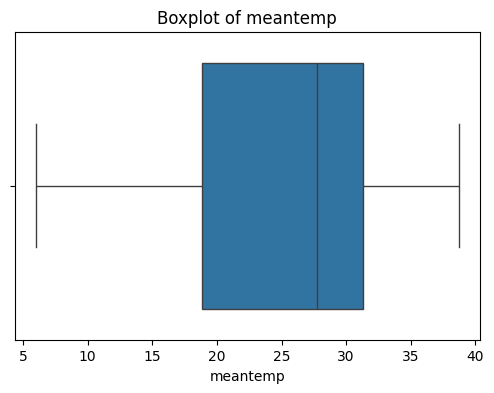

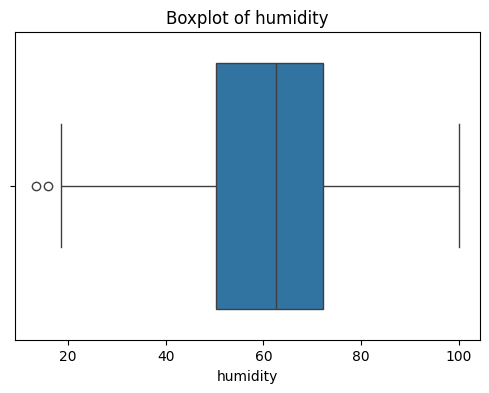

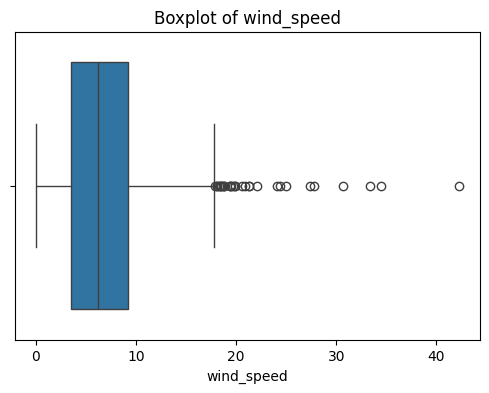

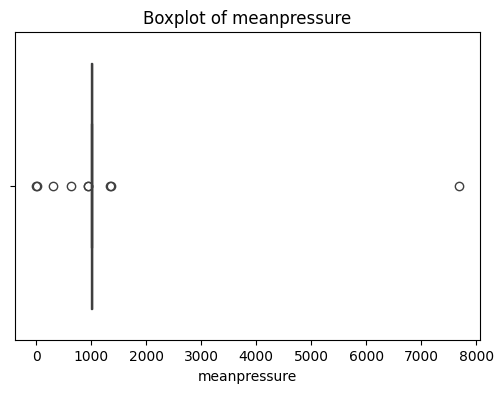

In [28]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


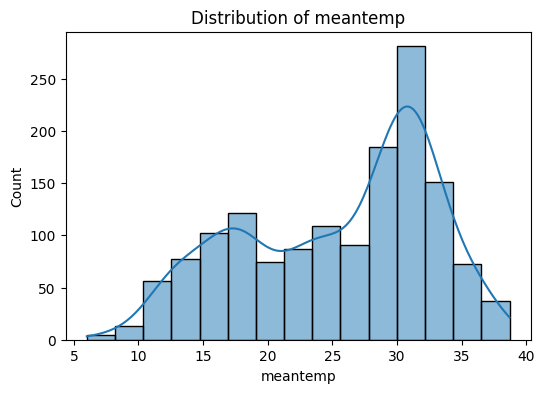

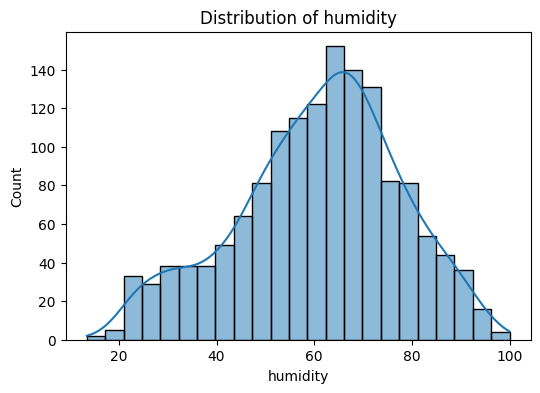

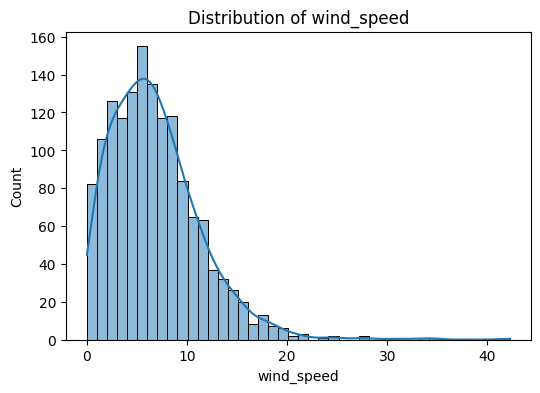

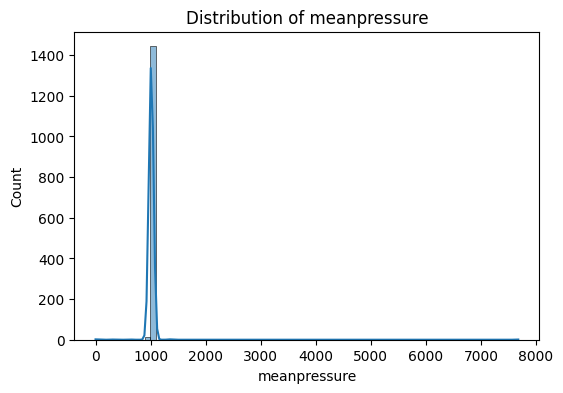

In [29]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [30]:
total_outliers_iqr = df['IQR_Outlier'].sum()
total_outliers_z = df['Z_Outlier'].sum()

print(f"Total rows flagged by IQR method: {total_outliers_iqr}")
print(f"Total rows flagged by Z-score method: {total_outliers_z}")

print(f"\nPercentage of outliers (IQR): {100 * total_outliers_iqr / len(df):.2f}%")
print(f"Percentage of outliers (Z-score): {100 * total_outliers_z / len(df):.2f}%")


Total rows flagged by IQR method: 41
Total rows flagged by Z-score method: 18

Percentage of outliers (IQR): 2.80%
Percentage of outliers (Z-score): 1.23%


In [31]:
df['Outlier'] = df['IQR_Outlier'] | df['Z_Outlier']
print(f"Final outlier count (either method): {df['Outlier'].sum()}")
print("\nSample outlier rows:")
print(df[df['Outlier']].head())


Final outlier count (either method): 41

Sample outlier rows:
             meantemp   humidity  wind_speed  meanpressure  month  year  day  \
date                                                                           
2013-03-01  17.333333  49.333333   24.066667   1016.333333      3  2013    1   
2013-05-01  31.857143  15.857143   12.685714   1002.833333      5  2013    1   
2013-08-24  32.000000  71.250000   18.525000   1000.333333      8  2013   24   
2013-09-09  31.000000  57.500000   42.220000   1007.000000      9  2013    9   
2013-11-08  18.000000  82.200000   19.912500   1015.625000     11  2013    8   

            IQR_Outlier  Z_Outlier  Outlier  
date                                         
2013-03-01         True       True     True  
2013-05-01         True      False     True  
2013-08-24         True      False     True  
2013-09-09         True       True     True  
2013-11-08         True      False     True  


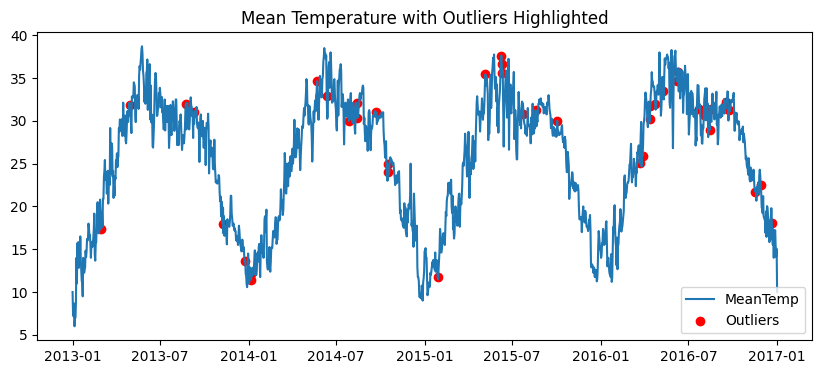

In [32]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['meantemp'], label='MeanTemp')
plt.scatter(df[df['Outlier']].index, df[df['Outlier']]['meantemp'], color='red', label='Outliers')
plt.legend()
plt.title("Mean Temperature with Outliers Highlighted")
plt.show()


In [33]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year,day,IQR_Outlier,Z_Outlier,Outlier
date,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,1,False,False,False
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,2,False,False,False
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,3,False,False,False
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,4,False,False,False
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,5,False,False,False


In [94]:
X=df.drop(columns=['date','meantemp','class'],axis=1)
y=df['meantemp']

In [37]:
df=df.reset_index()

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

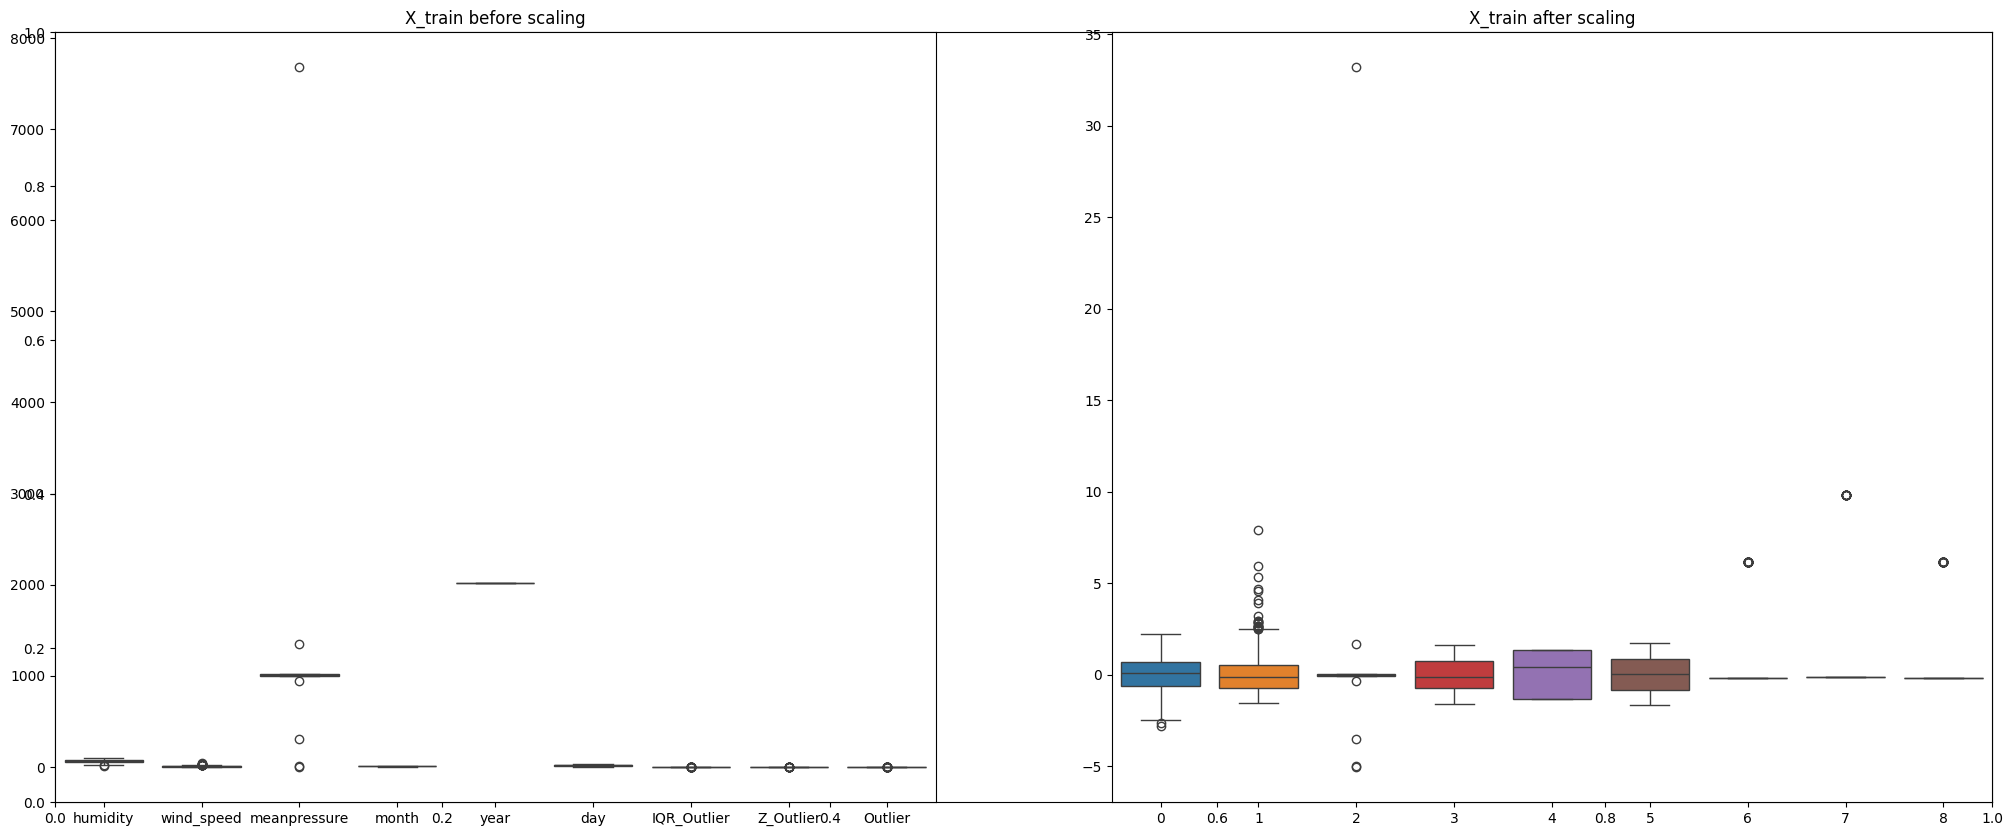

In [69]:
plt.subplots(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

Mean_absolute_error 4.934657197021189
R2 Score 0.3292740132162334


Text(0, 0.5, 'y_pred')

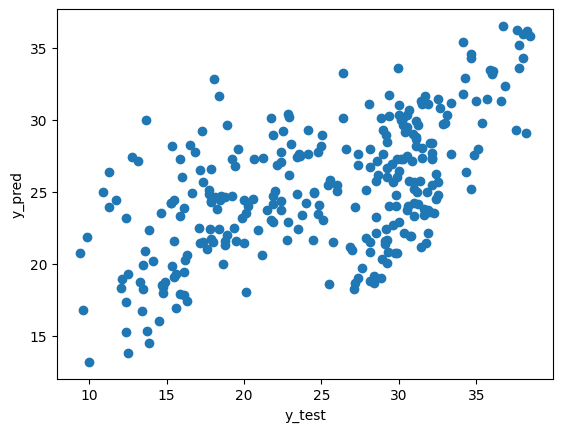

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean_absolute_error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Mean absolute error 5.381417923333726
R2 score 0.3005671766000876


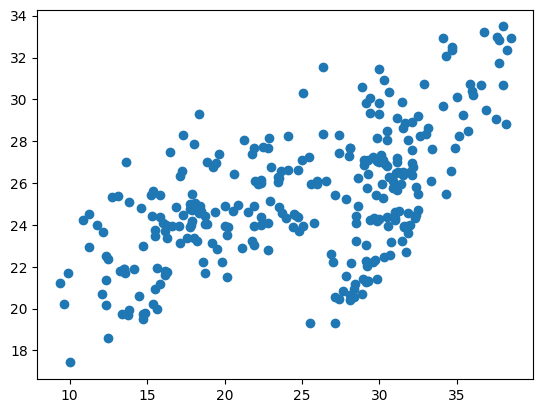

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 4.935411772599692
R2 score 0.3293221791026475


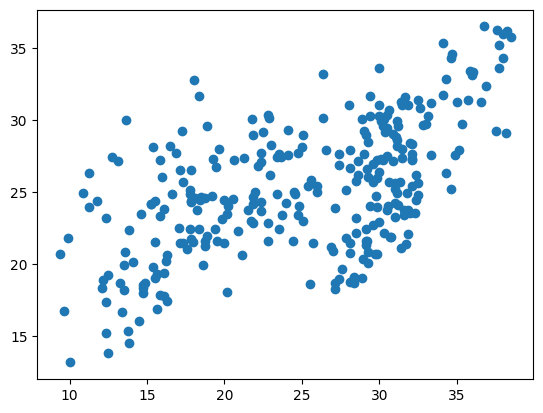

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 5.013760835438747
R2 score 0.3315411682686302


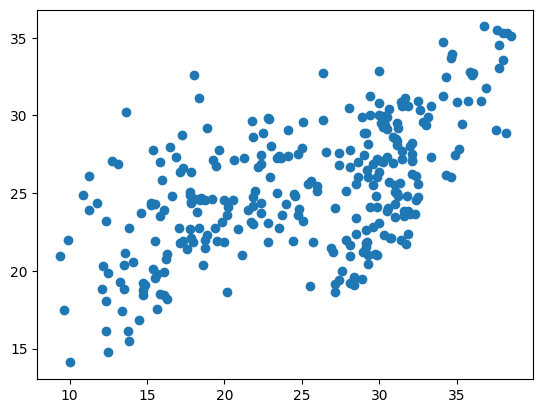

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet(alpha = 0.12)
ElasticNet.fit(X_train_scaled,y_train)
y_pred=ElasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

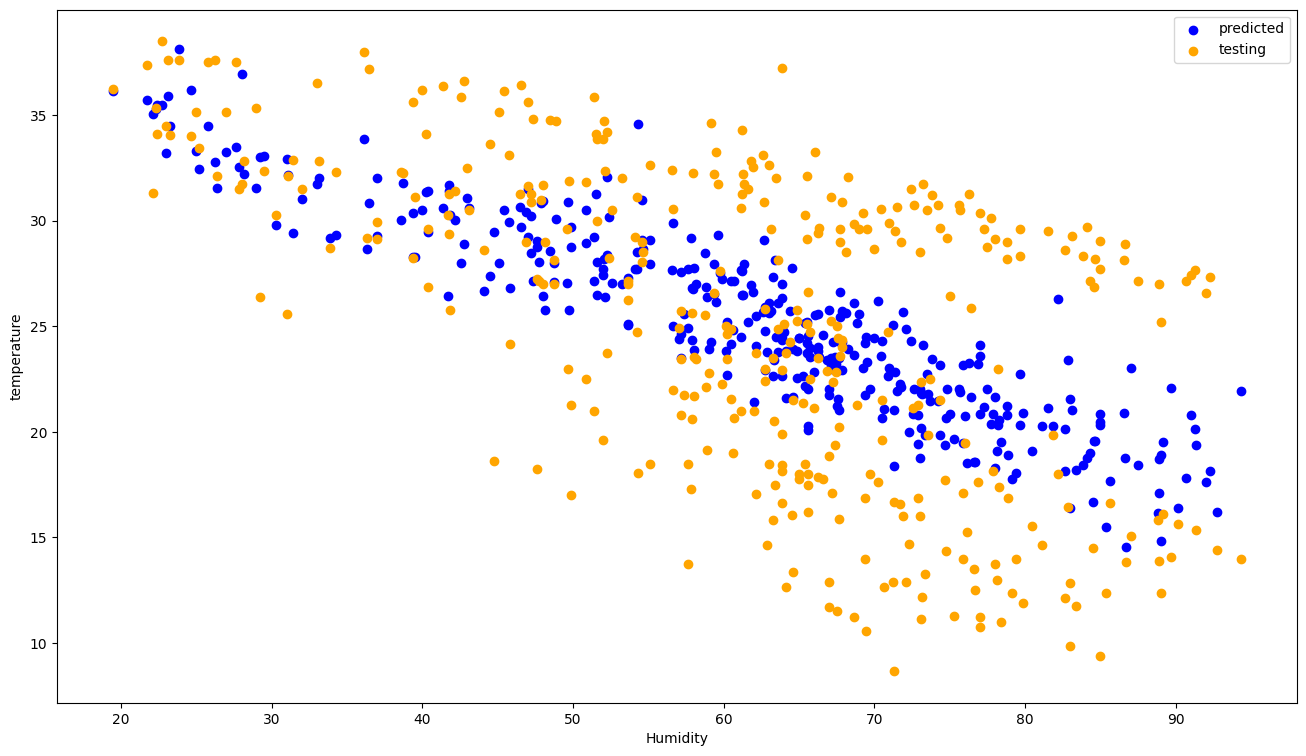

In [51]:
plt.figure(figsize=(16,9))
plt.scatter(X_test.humidity,lr.predict(X_test), color='blue', label = 'predicted')
plt.scatter(X_test.humidity,y_test, color='orange', label = 'testing')
plt.xlabel('Humidity')
plt.ylabel('temperature')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
y_pred=lr.predict(X_test)

In [57]:
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
score=r2_score(y_test,y_pred)

In [56]:
print(mae,mse,score)

4.849654866567905 34.76240876432097 -0.6778004289013781


In [59]:
df.duplicated().sum()

np.int64(0)

In [79]:
df['class'] = np.where(df['meantemp'] > 30, 1, 0)

In [80]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year,day,IQR_Outlier,Z_Outlier,Outlier,class
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,1,False,False,False,0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,2,False,False,False,0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,3,False,False,False,0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,4,False,False,False,0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,5,False,False,False,0


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
X=df.drop(columns=['date','class'],axis=1)
y=df['class']


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [84]:
lr=LogisticRegression()

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)


In [88]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [89]:
score = accuracy_score(y_pred, y_test)
print(score)

0.9795221843003413


In [90]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       198
           1       1.00      0.94      0.97        95

    accuracy                           0.98       293
   macro avg       0.99      0.97      0.98       293
weighted avg       0.98      0.98      0.98       293



In [108]:
df=df.reset_index()

In [121]:
df.reset_index()
X=df.drop(columns=['date','meantemp'],axis=1)
y=df['meantemp']

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [124]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train_scaled,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [129]:
y_pred=regressor.predict(X_test_scaled)

In [130]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))   

0.7911397216285738
2.4878148583646373
11.691112749366395


In [126]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [127]:
X.head()

,humidity,wind_speed,meanpressure
0,84.500000,0.000000,1015.666667
1,92.000000,2.980000,1017.800000
2,87.000000,4.633333,1018.666667
3,71.333333,1.233333,1017.166667
4,86.833333,3.700000,1016.500000


In [128]:
y.head()

0    10.000000
1     7.400000
2     7.166667
3     8.666667
4     6.000000
Name: meantemp, dtype: float64